# Evaluation insights for the BtEurope network

This notebook is copied and adjusted from the Abilene notebook.

**Inputs:**
* Algorithms: bjointsp, greedy, random
* Network: BtEurope
* Service: fw1chain, fw2chain, fw3chain
* Sources: source0-9

BtEurope is a medium-size network with 24 nodes and 37 edges. In comparison to the Airtel network, it is much denser, i.e., has shorter link delays.

![BtEurope](http://topology-zoo.org/maps/BtEurope.jpg)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# include and import place_emu/util/eval.py
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
from place_emu.util import eval


bjointsp_chain_df, bjointsp_aux_chain_df, bjointsp_vnf_df, bjointsp_aux_vnf_df = eval.prepare_eval('BtEurope', 'bjointsp')
greedy_chain_df, greedy_aux_chain_df, greedy_vnf_df, greedy_aux_vnf_df = eval.prepare_eval('BtEurope', 'greedy')
random_chain_df, random_aux_chain_df, random_vnf_df, random_aux_vnf_df = eval.prepare_eval('BtEurope', 'random')

In [2]:
# combined dfs for easier eval
aux_vnf_df = pd.concat([bjointsp_aux_vnf_df, greedy_aux_vnf_df, random_aux_vnf_df])
vnf_df = pd.concat([bjointsp_vnf_df, greedy_vnf_df, random_vnf_df])
chain_df = pd.concat([bjointsp_chain_df, greedy_chain_df, random_chain_df])

There are 12 different pandas dataframes, four for each of the placement algorithms. 

chain_df contains the delays (RTTs) of the whole chain and vnf_df contains the inter-VNF delays. They have separate columns for the simulation and emulation RTTs and additional columns for the difference and the ratio between simulation and emulation RTT.

For easier plotting later, aux_chain_df and aux_vnf_df contain the same data as chain_df and vnf_df, respectiveley, just in a different structure: Here, there is just one column called 'rtt'. Simulation and emulation delays are stored in the same column in different rows. They are distinguished by a new column 'type' that is either 'sim' or 'emu', classifying the type of RTT.

For better intuition, see the tables below.

In [3]:
bjointsp_chain_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
0,BtEurope,24,37,fw1chain,3,source0,1,bjointsp,4.0,5.00,1.00,1.250
1,BtEurope,24,37,fw1chain,3,source1,1,bjointsp,2.0,3.05,1.05,1.525
2,BtEurope,24,37,fw1chain,3,source2,1,bjointsp,2.0,3.05,1.05,1.525
3,BtEurope,24,37,fw1chain,3,source3,1,bjointsp,4.0,5.00,1.00,1.250
4,BtEurope,24,37,fw1chain,3,source4,1,bjointsp,2.0,2.95,0.95,1.475


In [4]:
bjointsp_aux_chain_df.head()

,algorithm,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,rtt,type
0,bjointsp,BtEurope,24,37,fw1chain,3,source0,1,4.0,sim
1,bjointsp,BtEurope,24,37,fw1chain,3,source1,1,2.0,sim
2,bjointsp,BtEurope,24,37,fw1chain,3,source2,1,2.0,sim
3,bjointsp,BtEurope,24,37,fw1chain,3,source3,1,4.0,sim
4,bjointsp,BtEurope,24,37,fw1chain,3,source4,1,2.0,sim


In [5]:
bjointsp_vnf_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,src,dest,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
0,BtEurope,24,37,fw1chain,3,source0,1,bjointsp,vnf_user,vnf_fw1,4.0,4.268,0.268,1.067000
1,BtEurope,24,37,fw1chain,3,source0,1,bjointsp,vnf_fw1,vnf_web,0.0,0.112,0.112,inf
2,BtEurope,24,37,fw1chain,3,source1,1,bjointsp,vnf_user,vnf_fw1,2.0,2.226,0.226,1.113000
3,BtEurope,24,37,fw1chain,3,source1,1,bjointsp,vnf_fw1,vnf_web,0.0,0.116,0.116,inf
4,BtEurope,24,37,fw1chain,3,source2,1,bjointsp,vnf_user,vnf_fw1,2.0,2.248,0.248,1.124000


## Inter-VNF RTT

Text(0.5,1,'Inter-VNF RTT')

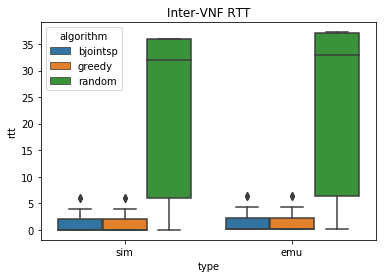

In [6]:
sns.boxplot(x='type', y='rtt', hue='algorithm', data=aux_vnf_df).set_title('Inter-VNF RTT')

The larger the network, the worse random placement becomes.

### Inter-VNF RTT difference

Absolute difference between emulated and simulated inter-VNF RTT: emu_rtt - sim_rtt

Text(0.5,1,'Inter-VNF RTT difference')

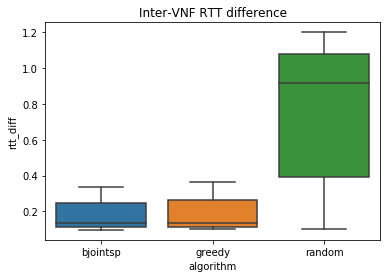

In [7]:
sns.boxplot(x='algorithm', y='rtt_diff', data=vnf_df).set_title('Inter-VNF RTT difference')

Random placement leads to longer paths and longer paths seem to lead to a higher difference in simulated and emulated delay. The larger the network, the clearer this observation.

Text(0.5,1,'Random inter-VNF RTT difference')

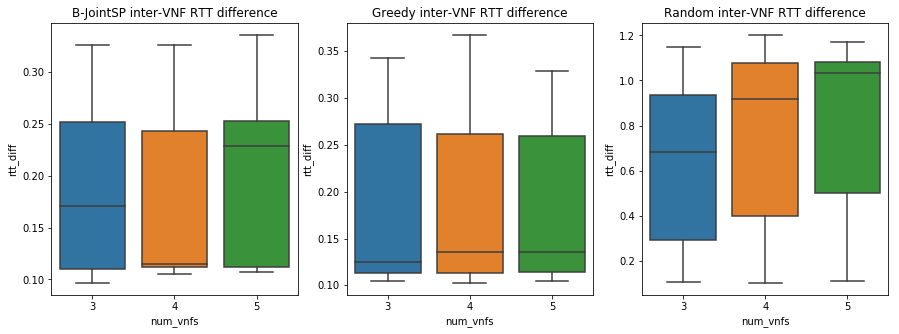

In [9]:
# plot RTT difference for different chain lengths
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='num_vnfs', y='rtt_diff', data=bjointsp_vnf_df, ax=ax1).set_title('B-JointSP inter-VNF RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=greedy_vnf_df, ax=ax2).set_title('Greedy inter-VNF RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=random_vnf_df, ax=ax3).set_title('Random inter-VNF RTT difference')

As expected, the chain length does not affect the inter-VNF RTT significantly.

Text(0.5,1,'Random placement')

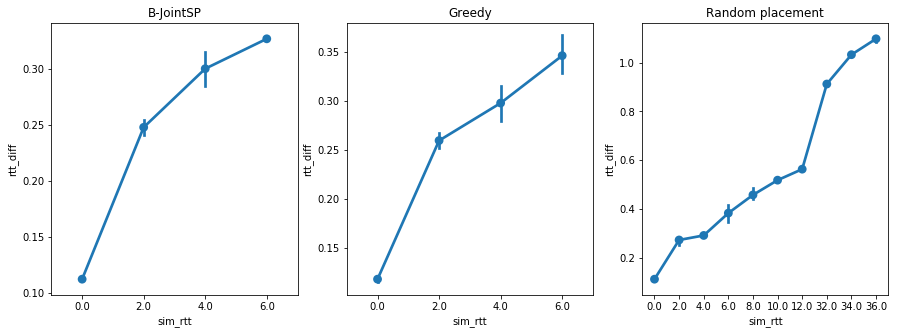

In [10]:
# plot RTT difference as a variable of the node distance = link delay = sim delay/RTT
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.pointplot(x='sim_rtt', y='rtt_diff', data=bjointsp_vnf_df, ax=ax1).set_title('B-JointSP')
sns.pointplot(x='sim_rtt', y='rtt_diff', data=greedy_vnf_df, ax=ax2).set_title('Greedy')
sns.pointplot(x='sim_rtt', y='rtt_diff', data=random_vnf_df, ax=ax3).set_title('Random placement')

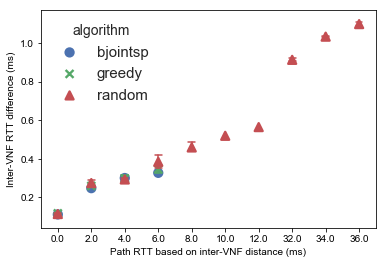

In [11]:
# tuned figure for paper
fig, ax = plt.subplots()
sns.set(font_scale=1.5)
#black_palette = sns.color_palette(['black', 'black', 'black'])
sns.pointplot(x='sim_rtt', y='rtt_diff', data=vnf_df, ax=ax,
              hue='algorithm', join=False, markers=['o', 'x', '^'], errwidth=1.5, capsize=0.2)
#ax.set_title('Difference emulated vs simulated inter-VNF RTT')
ax.set_xlabel('Path RTT based on inter-VNF distance (ms)')
ax.set_ylabel('Inter-VNF RTT difference (ms)')
ax.set_facecolor('white')
fig.savefig('plots/bteurope_vnf_rtt_diff_sim_rtt.pdf', bbox_inches='tight')

The difference of emulated and simulated inter-VNF RTTs increases with increasing simulated inter-VNF RTT. The simulated inter-VNF RTT directly reflects the link delay and thus distance between two connected VNFs.

Hence, for two very close VNFs, the simulated and emulated delays are almost identical, but for VNFs that are placed farther away (higher sim_rtt), the emulated delay can be significantly larger than the simulated delay.


### Inter-VNF RTT ratio

Relative ratio of emulated vs. simulated inter-VNF RTT: emu_rtt / sim_rtt

Set to infinity if sim_rtt = 0.

In [17]:
# set infinite ratios to NaN, so they are ignored when plotting
vnf_df = vnf_df.replace(np.inf, np.nan)
for alg in ['bjointsp', 'greedy', 'random']:
    num_invalid = vnf_df.loc[(vnf_df['algorithm'] == alg) & (vnf_df['rtt_ratio'].isnull())].shape[0]
    num_total = vnf_df.loc[vnf_df['algorithm'] == alg].shape[0]
    print('Entries with invalid ratio for {}: {} of {}'.format(alg, num_invalid, num_total))

Entries with invalid ratio for bjointsp: 46 of 90
Entries with invalid ratio for greedy: 50 of 90
Entries with invalid ratio for random: 6 of 90


Text(0.5,1,'Inter-VNF RTT ratio')

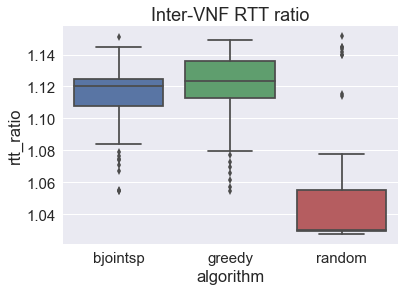

In [16]:
sns.boxplot(x='algorithm', y='rtt_ratio', data=vnf_df).set_title('Inter-VNF RTT ratio')

We now have results with 0 simulated delay because the VNFs are so close that the link delay is rounded to 0 ms. For these results the ratio is invalid (can't divide by 0). As there are so many of these values for bjointsp and greedy, the plot is pretty meaningless.

It only confirms the previous observation: While longer paths (random placement) lead to higher absolute difference between simulation and emulation, their relative ratio actually decreases.

Here, emulation leads to more than 10% higher RTTs for the plotted bjointsp and greedy results.

## Chain RTT

Let's continue the evaluation by analyzing the RTT of the whole chain, comparing the different placement algorithms.

Text(0.5,1,'Emulation chain RTT')

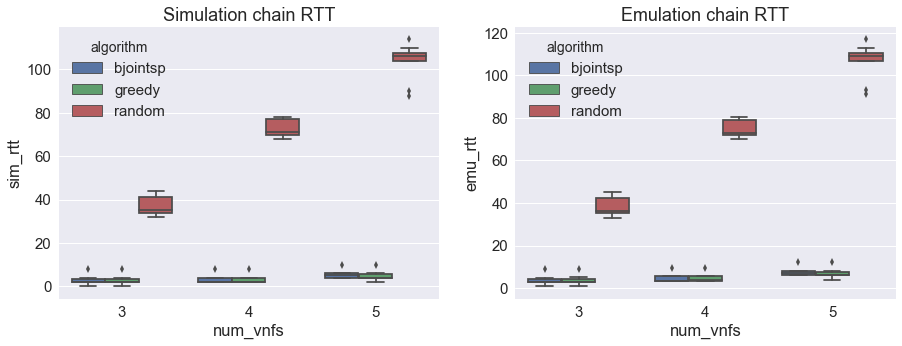

In [18]:
# comparison of bjointsp and random placement
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='num_vnfs', y='sim_rtt', hue='algorithm', data=chain_df, ax=ax1).set_title('Simulation chain RTT')
sns.boxplot(x='num_vnfs', y='emu_rtt', hue='algorithm', data=chain_df, ax=ax2).set_title('Emulation chain RTT')

Text(0.5,1,'Random chain RTT')

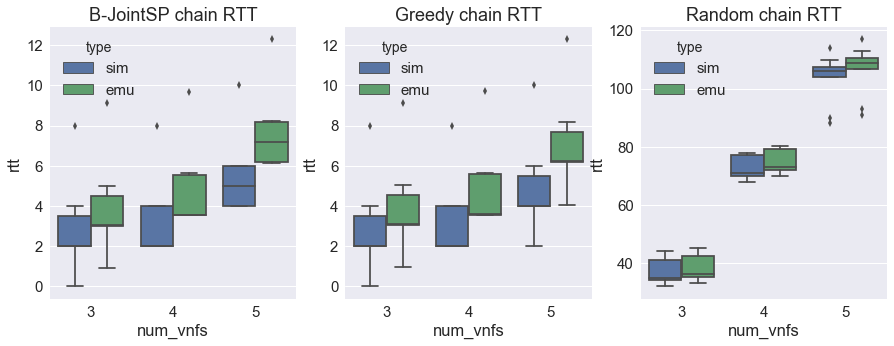

In [19]:
# comparison of simulation and emulation delays
# this is what aux_chain_df is for
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='num_vnfs', y='rtt', hue='type', data=bjointsp_aux_chain_df, ax=ax1).set_title('B-JointSP chain RTT')
sns.boxplot(x='num_vnfs', y='rtt', hue='type', data=greedy_aux_chain_df, ax=ax2).set_title('Greedy chain RTT')
sns.boxplot(x='num_vnfs', y='rtt', hue='type', data=random_aux_chain_df, ax=ax3).set_title('Random chain RTT')

### Chain RTT difference

Absolute difference between emulated and simulated chain RTT: emu_rtt - sim_rtt

Text(0.5,1,'Random chain RTT difference')

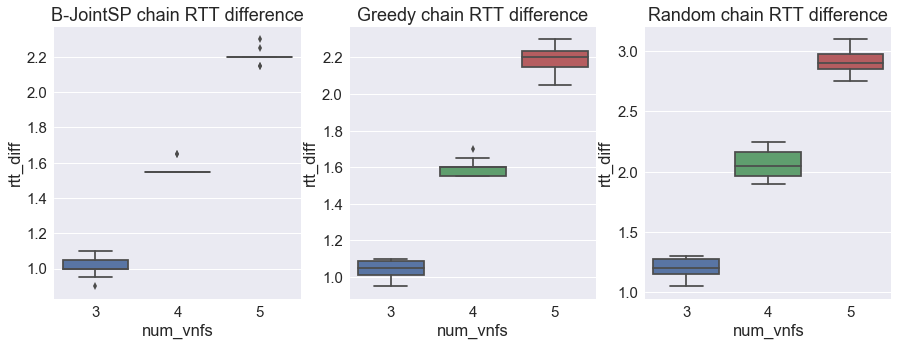

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='num_vnfs', y='rtt_diff', data=bjointsp_chain_df, ax=ax1).set_title('B-JointSP chain RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=greedy_chain_df, ax=ax2).set_title('Greedy chain RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=random_chain_df, ax=ax3).set_title('Random chain RTT difference')

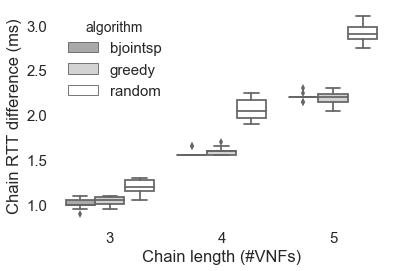

In [22]:
# tuned figure for paper
fig, ax = plt.subplots()
sns.set(font_scale=1.5)
grayscale = sns.color_palette(['darkgray', 'lightgray', 'white'])
sns.boxplot(x='num_vnfs', y='rtt_diff', hue='algorithm', data=chain_df, ax=ax, palette=grayscale)
#ax.set_title('Difference emulated vs simulated chain RTT')
ax.set_xlabel('Chain length (#VNFs)')
ax.set_ylabel('Chain RTT difference (ms)')
ax.set_facecolor('white')
fig.savefig('plots/airtel_chain_rtt_diff.pdf', bbox_inches='tight')

Looking at the difference in RTT, the emulation delay is clearly higher than the simulation delay. And the difference between the two increases with increasing chain length. There is surprisingly little deviation/spread in rtt_diff for each chain length, meaning that any difference can be well explained through chain length.

For random placement, the absolute difference between simulated and emulated chain RTTs is a little higher (longer paths).


### Chain RTT ratio

Relative ratio of emulated vs. simulated chain RTT: emu_rtt / sim_rtt

Text(0.5,1,'Chain RTT ratio')

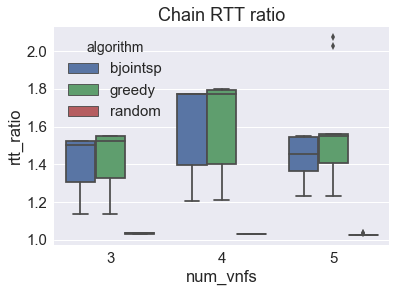

In [23]:
sns.boxplot(x='num_vnfs', y='rtt_ratio', hue='algorithm', data=chain_df).set_title('Chain RTT ratio')

# Conclusion

* No more outliers in BtEurope after fix
* Similar findings like for other networks